# Linear fit
In this notebook, we show how to accomplish a simple linear fit with ntb.

In [1]:
import ntb
import numpy as np
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
#we define a linear function

a0,b0 = .3, 1.2
x_min, x_max = -5., 5.

def f(t):
    return t*a0+b0

#and create some noisy samples around it

x_data = np.random.uniform(size=75,low=x_min,high=x_max)
y_data = np.random.normal(loc=f(x_data),scale=.6)
x_interval = np.array([x_min,x_max])

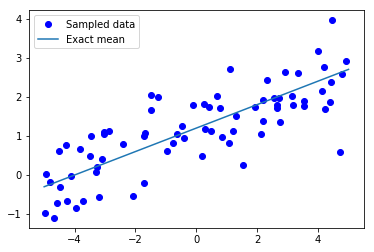

In [3]:
#a plot of the data and exact mean of the y-distribution depending on x

pp.plot(x_data,y_data,'bo',label="Sampled data")
pp.plot(x_interval,f(x_interval),label="Exact mean")
pp.legend()
pp.show()

In [4]:
#we start off building a computational graph

graph = ntb.ComputationGraph()
with ntb.default_graph(graph):
    #we add placeholders for the data
    x = ntb.Placeholder(shape=[-1])
    y = ntb.Placeholder(shape=[-1])
    #and learnable variables a,b for the slope and y intercept respectively
    a = ntb.Variable()
    b = ntb.Variable()
    #we define a node for the predicted y-output, given x,a,b
    y_pred = a*x + b
    #we define the mean square error
    mean_square_error = ((y_pred - y)**2).mean()
    #and add an optimization node, which when evaluated adjusts all learnable parameters
    #to minimize the loss node that was passed to it. we set the learning rate to 1e-1
    optim = ntb.Optim(mean_square_error,lr=1e-1)

#we define a function for our linear fit, which runs the y_pred node defined above
#its argument t is assigned to the placeholder node x
def f_fit(t):
    pred, = graph.run([y_pred],assign_dict={x:t})
    return pred

In [5]:
iter = 100

#we run the mean square error and optimization node for 100 iterations
#x and y are assigned our artificial x- and y-data
for i in range(iter+1):
    #we keep track of the mean squared error and
    #ignore the output of optim (which just evaluates to True)
    mse,_ = graph.run([mean_square_error,optim],assign_dict={x:x_data,y:y_data})
    if (i % 10) == 0:
        print("MSE:",mse)

MSE: 2.75004264707
MSE: 0.873715300508
MSE: 0.762342758308
MSE: 0.49349335731
MSE: 0.462006071443
MSE: 0.428178762013
MSE: 0.422081342682
MSE: 0.418368889679
MSE: 0.417407375215
MSE: 0.417062662836
MSE: 0.416930997041


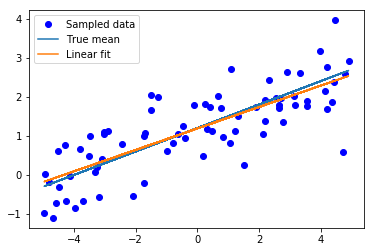

In [6]:
#we plot the data again, this time adding our linear fit into the mix

pp.plot(x_data,y_data,'bo',label="Sampled data")
pp.plot(x_data,f(x_data),label="True mean")
pp.plot(x_data,f_fit(x_data),label="Linear fit")
pp.legend()
pp.show()